# Camunda 8 Workers:
## Power Consumption at Startup

*06.12.23, Author: Jan Wittrowski*

### Cheatsheet

```df.loc[row, col]```

# Sum up the first three cells of each column
sum_first_three = df.iloc[:3].sum()


## Importing, Preparation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read first CSV containing idle measurement 1-7
rawdata = pd.read_csv("CSV/start_1_8_all_pods.csv", 
                     header=1, # which row contains column headers
                     index_col=0   ) # which column contains labels

rawdata

,bpmndeployment-8l9w6 / camunda8 / PKG,camunda-platform-connectors-7d745cc4cd-lk6h4 / camunda8 / PKG,camunda-platform-elasticsearch-master-0 / camunda8 / PKG,camunda-platform-elasticsearch-master-1 / camunda8 / PKG,camunda-platform-operate-745dd6ffbd-hd2s7 / camunda8 / PKG,camunda-platform-tasklist-595f9975f6-62bbr / camunda8 / PKG,camunda-platform-zeebe-0 / camunda8 / PKG,camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG,console-worker-console-worker-chart-camunda-8-go-console-wfzxss / camunda8 / PKG,processstart-xb5jm / camunda8 / PKG,...,restworkerjava-bfdc4578f-lt4tx / worker / OTHER,restworkerjava-bfdc4578f-mrqpc / worker / OTHER,restworkerjava-bfdc4578f-nhkwl / worker / OTHER,restworkerjava-bfdc4578f-nndf8 / worker / OTHER,restworkerjava-bfdc4578f-pp54q / worker / OTHER,restworkerjava-bfdc4578f-t8bxq / worker / OTHER,restworkerjava-bfdc4578f-vqp6c / worker / OTHER,restworkerjava-bfdc4578f-wqvbt / worker / OTHER,restworkerjava-bfdc4578f-xwrzk / worker / OTHER,restworkerjava-bfdc4578f-zz5sn / worker / OTHER
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-06 14:15:30,0.0684,0.0933,0.248,0.262,0.1140,0.1130,1.43,0.344,0.0729,0.0684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06 14:15:40,0.0684,0.0924,0.262,0.280,0.1130,0.0978,1.53,0.362,0.0723,0.0684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06 14:15:50,0.0888,0.1220,0.361,0.328,0.1650,0.1210,2.44,0.564,0.0945,0.0888,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06 14:16:00,0.0666,0.1070,0.259,0.276,0.1110,0.1030,1.58,0.381,0.0705,0.0666,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-06 14:16:10,0.0666,0.0921,0.255,0.290,0.1140,0.0957,1.52,0.365,0.0714,0.0666,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06 14:34:20,0.0507,0.0690,0.187,0.174,0.0822,0.0660,1.36,0.319,0.0570,0.0507,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2023-12-06 14:34:30,0.0507,0.0690,0.187,0.174,0.0822,0.0660,1.36,0.319,0.0570,0.0507,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
2023-12-06 14:34:40,0.0507,0.0690,0.187,0.174,0.0822,0.0660,1.36,0.319,0.0570,0.0507,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [7]:
# remove irrelevant columns: 

columns_to_keep = rawdata.columns[~rawdata.columns.str.contains('OTHER|measuring-endpoints|monitoring|console-worker|tasklist|operate|bpmndeployment|processstart|elasticsearch')]
data = rawdata.loc[:, columns_to_keep]

columns_to_keep

Index(['camunda-platform-connectors-7d745cc4cd-lk6h4 / camunda8 / PKG',
       'camunda-platform-zeebe-0 / camunda8 / PKG',
       'camunda-platform-zeebe-gateway-5b66c5dffb-5swg8 / camunda8 / PKG',
       'coredns-77ccd57875-qkp4q / kube-system / PKG',
       'helm-install-traefik-crd-hzktt / kube-system / PKG',
       'helm-install-traefik-ncp5n / kube-system / PKG',
       'local-path-provisioner-957fdf8bc-jnlfw / kube-system / PKG',
       'metrics-server-648b5df564-msqlc / kube-system / PKG',
       'svclb-traefik-5671c552-795qx / kube-system / PKG',
       'traefik-768bdcdcdd-4f8ms / kube-system / PKG',
       'system_processes / system / PKG',
       'restworkerjava-bfdc4578f-28vh8 / worker / PKG',
       'restworkerjava-bfdc4578f-4cvph / worker / PKG',
       'restworkerjava-bfdc4578f-5dlm7 / worker / PKG',
       'restworkerjava-bfdc4578f-5sjjr / worker / PKG',
       'restworkerjava-bfdc4578f-6d6vd / worker / PKG',
       'restworkerjava-bfdc4578f-6jbbk / worker / PKG',
     

In [9]:
# import start times from obsidian docs

start_times_single = [
    '2023-12-06 14:15:30', 
    '2023-12-06 14:18:00',
    '2023-12-06 14:20:30',
    '2023-12-06 14:23:00'
]
start_times_multiple = [
    '2023-12-06 14:26:30', 
    '2023-12-06 14:29:00',
    '2023-12-06 14:31:30',
]

start_times_single_info = [
    '0 -> 1',
    '1 -> 2',
    '2 -> 3',
    '3 -> 4'
]
start_times_multiple_info = [
    '0 -> 4',
    '4 -> 8',
    '8 -> 16'
]

In [10]:
# create dataframe for each start-measurement
worker_starts  = []

for time in start_times_single:
    index = data.index.get_loc(time)
    temp = data.iloc[index:index + 15,:]
    temp = temp.dropna(how='all', axis=1)
    worker_starts.append(temp)


In [11]:
# create namespace sums for workers

namespace_sum = []
namespaces = []

# read namespaces from columns. 
# This relies on grafana CSV-outputs using '/' as a divider: "pod / namespace / domain"
for col in data.columns:
    split_col = col.split('/')
    if len(split_col) > 1:
        if split_col[1] not in namespaces:
            namespaces.append(split_col[1].strip())

for worker in worker_starts:
    worker_sums = pd.DataFrame()

    for namespace in namespaces:
        namespace_cols = [col for col in worker.columns if namespace in col]

        worker_sums[namespace] = worker[namespace_cols].sum(axis=1)  

    namespace_sum.append(worker_sums)

namespace_sum[2]

,camunda8,kube-system,system,worker
Time,,,,
2023-12-06 14:20:30,2.0847,0.7930,3.2606,0.2079
2023-12-06 14:20:40,2.0366,0.7521,4.7313,0.1971
2023-12-06 14:20:50,3.7842,1.0308,6.1735,7.1438
2023-12-06 14:21:00,1.9787,0.7466,3.5184,0.3054
2023-12-06 14:21:10,2.1709,0.7412,3.4409,0.3135
2023-12-06 14:21:20,2.6706,0.9573,4.1324,0.3872
2023-12-06 14:21:30,2.0355,0.7514,3.0763,0.3252
2023-12-06 14:21:40,1.9110,0.7374,3.5898,0.2982
2023-12-06 14:21:50,2.7656,0.9598,4.0831,0.3892


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '00:10'),
  Text(1, 0, '00:20'),
  Text(2, 0, '00:30'),
  Text(3, 0, '00:40'),
  Text(4, 0, '00:50'),
  Text(5, 0, '01:00'),
  Text(6, 0, '01:10'),
  Text(7, 0, '01:20'),
  Text(8, 0, '01:30'),
  Text(9, 0, '01:40'),
  Text(10, 0, '01:50'),
  Text(11, 0, '02:00'),
  Text(12, 0, '02:10'),
  Text(13, 0, '02:20'),
  Text(14, 0, '02:30')])

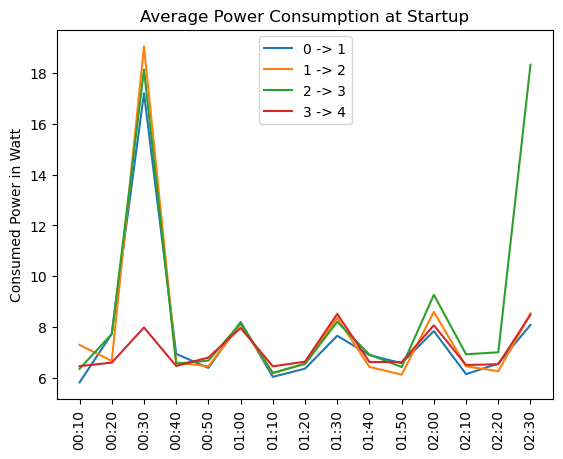

In [12]:
# create relative timestamps
elapsed_times = []
for i in range(1,16):
    s = i * 10 % 60
    m = int(i / 6)
    elapsed_times.append("{:02d}:{:02d}".format(m,s))


# plot time series
fig, ax = plt.subplots()

for series in namespace_sum:
  sums = series.sum(axis = 1)
  plt.plot(elapsed_times, sums)

ax.set_ylabel('Consumed Power in Watt')
ax.set_title('Average Power Consumption at Startup')
ax.legend(start_times_single_info)
plt.xticks(rotation='vertical')

*'3 -> 4' is the runaway*

In [13]:
# throw out measurement 4 "3 -> 4"
start_min_sum = namespace_sum[0:3] # upper boundary not included
second_min_sum =  namespace_sum[0:3]

# save first and second minute
for i, frame in enumerate(start_min_sum):
    start_min_sum[i] = frame.iloc[0:6,:]
    second_min_sum[i] = frame.iloc[6:12,:]

second_min_sum[0]

,camunda8,kube-system,system,worker
Time,,,,
2023-12-06 14:16:30,1.9189,0.7852,3.2016,0.1222
2023-12-06 14:16:40,2.0116,0.7547,3.4862,0.0978
2023-12-06 14:16:50,2.6396,1.0164,3.8458,0.1446
2023-12-06 14:17:00,1.9575,0.8593,3.9598,0.1086
2023-12-06 14:17:10,2.1900,0.7910,3.4831,0.1020
2023-12-06 14:17:20,2.6313,1.0361,4.0173,0.1466


## Energy Consumption in first Minute by Namespace

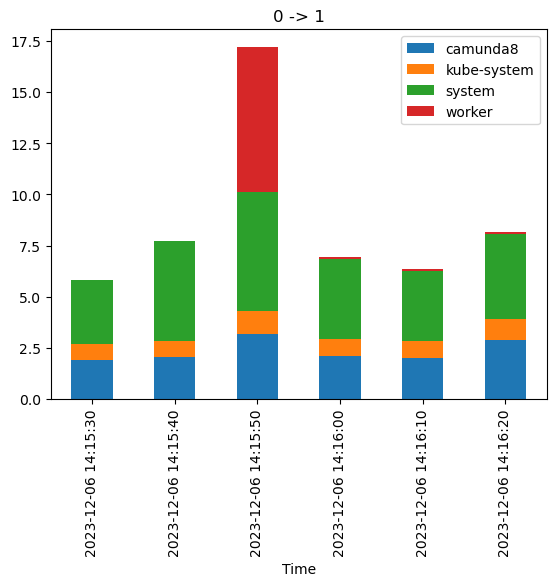

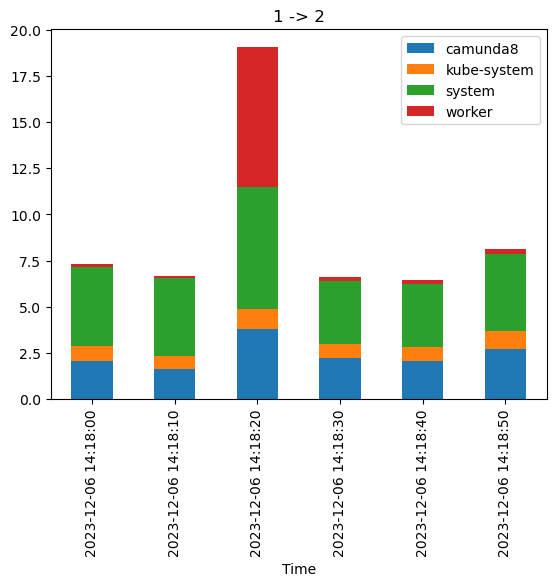

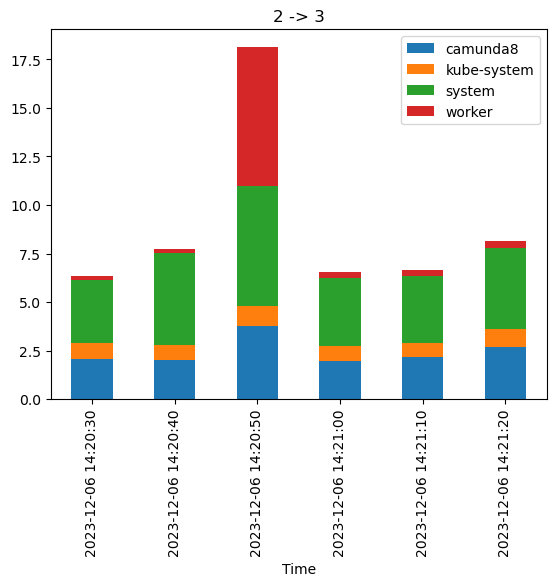

In [14]:
elapsed_times = []
for i in range(1,7):
    s = i * 10 % 60
    m = int(i / 6)
    elapsed_times.append("{:02d}:{:02d}".format(m,s))

for i, frame in enumerate(start_min_sum):
    plot = frame.plot(kind="bar", stacked="True", title=start_times_single_info[i])

### 1st minute average by namespace

In [15]:
average_start_by_namespace = pd.DataFrame()

for i, frame in enumerate(start_min_sum):

    average_start_by_namespace[start_times_single_info[i]] = frame.sum(axis=0)
    
average_start_by_namespace

,0 -> 1,1 -> 2,2 -> 3
camunda8,14.1802,14.4523,14.7257
kube-system,5.3286,5.1547,5.0210
system,25.2797,26.0639,25.2571
worker,7.4465,8.4568,8.5549


### 2nd minute average by namespace

In [16]:
average_second_min_by_namespace = pd.DataFrame()

for i, frame in enumerate(second_min_sum):

    average_second_min_by_namespace[start_times_single_info[i]] = frame.sum(axis=0)
    
average_second_min_by_namespace

,0 -> 1,1 -> 2,2 -> 3
camunda8,13.3489,13.4423,13.6699
kube-system,5.2427,5.1122,4.9893
system,21.9938,22.2744,22.8462
worker,0.7218,1.3584,1.9993


### Difference between 1st and 2nd minute

In [17]:
diff_in_minutes = average_start_by_namespace - average_second_min_by_namespace

diff_in_minutes

,0 -> 1,1 -> 2,2 -> 3
camunda8,0.8313,1.0100,1.0558
kube-system,0.0859,0.0425,0.0317
system,3.2859,3.7895,2.4109
worker,6.7247,7.0984,6.5556


<Axes: >

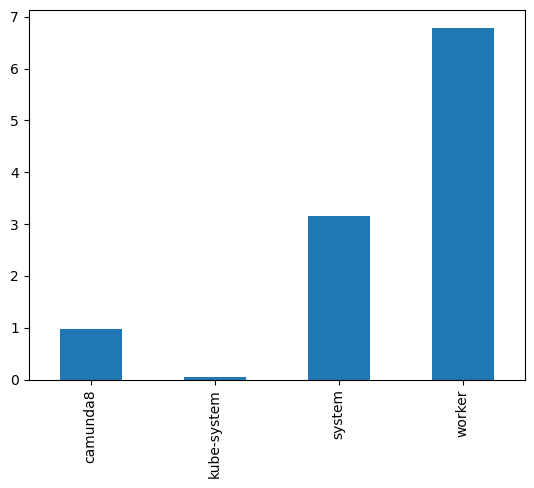

In [18]:
series = diff_in_minutes.mean(axis=1)

series.plot(kind="bar")

# Starting multiple workers

The 2nd set of measurements involved starting multiple workers at one to see if the energy consumed would be proportional to starting individual pods 

In [37]:
# create dataframes for each first and second minute of starting

first_min_multiple = []
second_min_multiple = []

for time in start_times_multiple:
    start_index = data.index.get_loc(time)

    first_min_multiple.append(pd.DataFrame(data.iloc[start_index : start_index + 6,:]))
    second_min_multiple.append(pd.DataFrame(data.iloc[start_index + 6 : start_index + 12,:]))


0.707
0.537


In [38]:
# summing up all pods in namespace

first_min_multiple_by_namespaces =[]
second_min_multiple_by_namespaces =[]

# first minute
for worker in first_min_multiple:
    temp1 = pd.DataFrame()

    for namespace in namespaces:
        namespace_cols = [col for col in worker.columns if namespace in col]
        temp1[namespace] = worker[namespace_cols].sum(axis=1)  

    first_min_multiple_by_namespaces.append(temp1)

# second minute
for worker in second_min_multiple:
    temp2 = pd.DataFrame()

    for namespace in namespaces:
        namespace_cols = [col for col in worker.columns if namespace in col]
        temp2[namespace] = worker[namespace_cols].sum(axis=1)  

    second_min_multiple_by_namespaces.append(temp2)

second_min_multiple_by_namespaces[1]

,camunda8,kube-system,system,worker
Time,,,,
2023-12-06 14:30:00,2.0892,0.7258,3.3322,0.7851
2023-12-06 14:30:10,2.0911,0.6630,3.6672,0.7359
2023-12-06 14:30:20,2.9475,0.8688,4.5286,0.9721
2023-12-06 14:30:30,2.0214,0.6610,3.3077,0.7257
2023-12-06 14:30:40,2.1797,0.6781,3.4257,0.6870
2023-12-06 14:30:50,2.6984,0.8565,4.0174,0.9741


## Plotting Multiple Workers

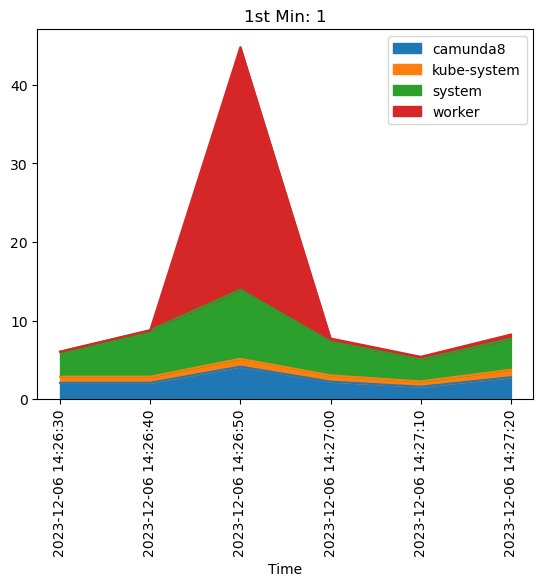

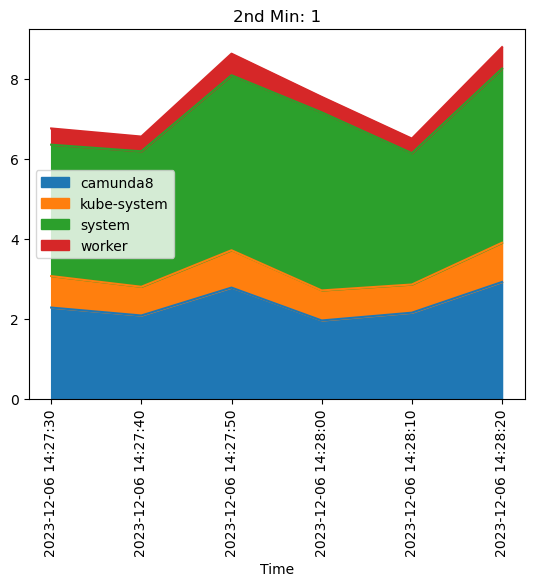

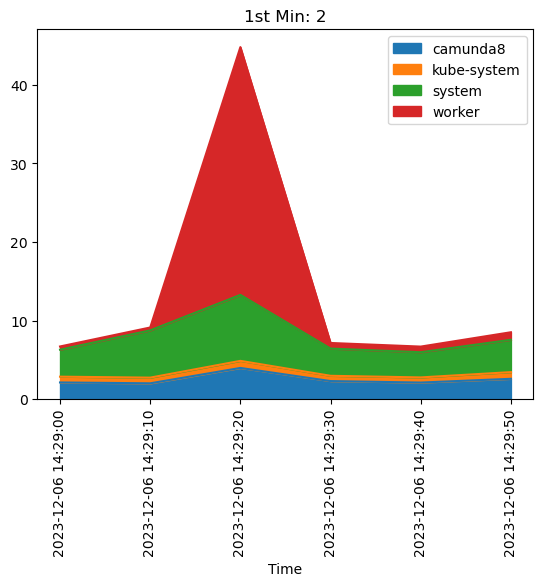

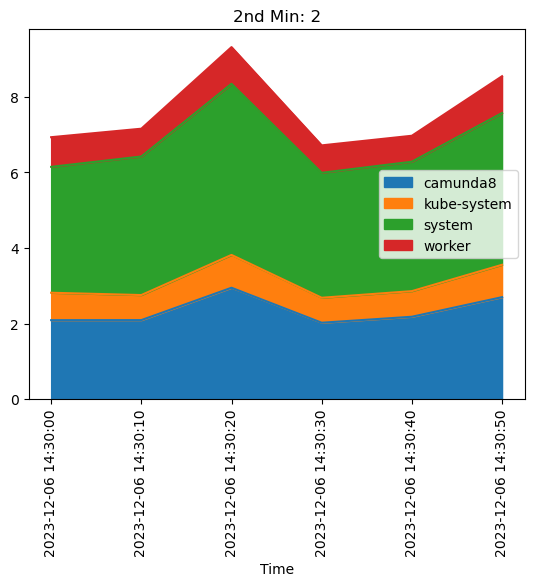

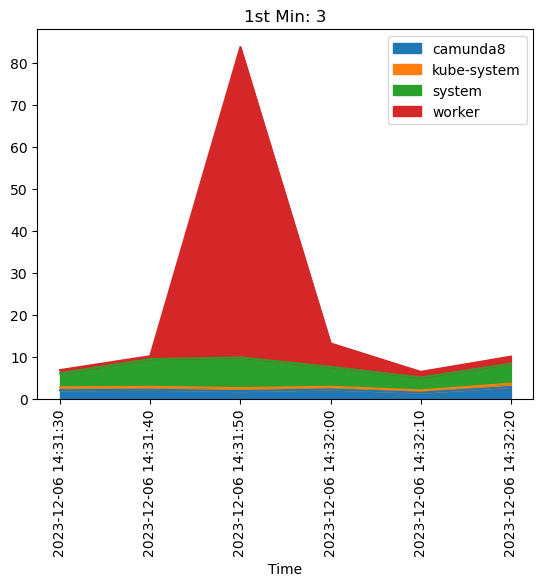

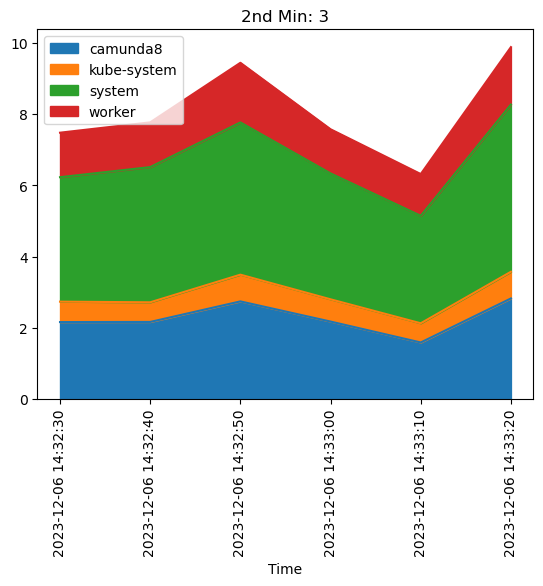

In [39]:
for i in range(0,3):
    first_min_multiple_by_namespaces[i].plot(kind="area", title="1st Min: {}".format(i+1))
    plt.xticks(rotation="vertical")
    second_min_multiple_by_namespaces[i].plot(kind="area", title="2nd Min: {}".format(i+1))
    plt.xticks(rotation="vertical")

### Starting multiple workers: Consumption per worker

In [46]:
# import (copy) info from obsidian

# number of started workers per measurement
second_min_multiple_by_namespaces_per_worker = []
first_min_multiple_by_namespaces_per_worker = []

how_many_started = [ 4, 4, 8]

for i in range(len(how_many_started)):
    second_min_multiple_by_namespaces_per_worker.append(second_min_multiple_by_namespaces[i] / how_many_started[i])
    first_min_multiple_by_namespaces_per_worker.append(first_min_multiple_by_namespaces[i] / how_many_started[i])



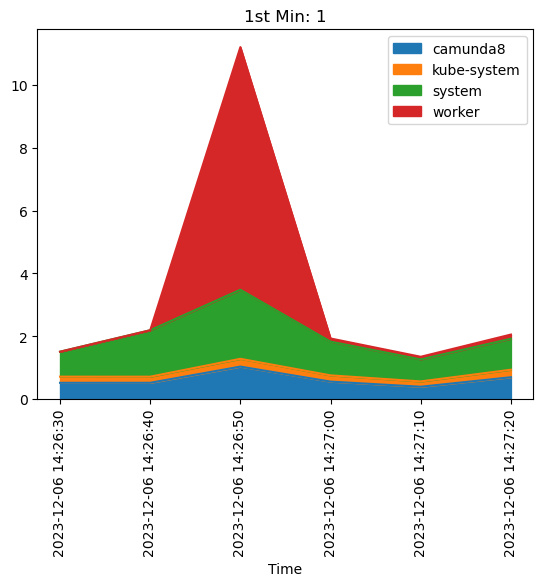

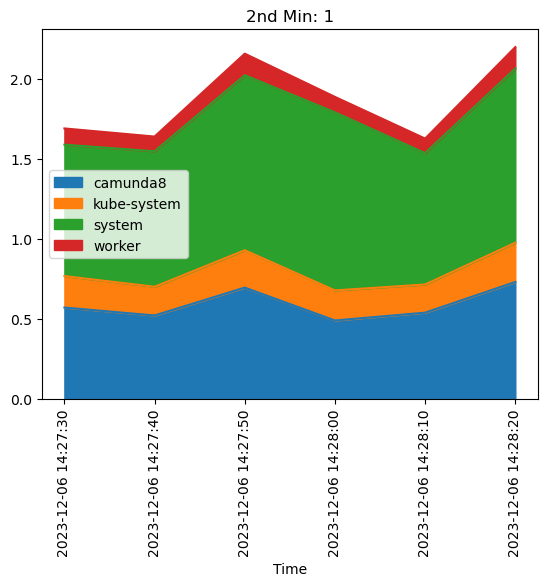

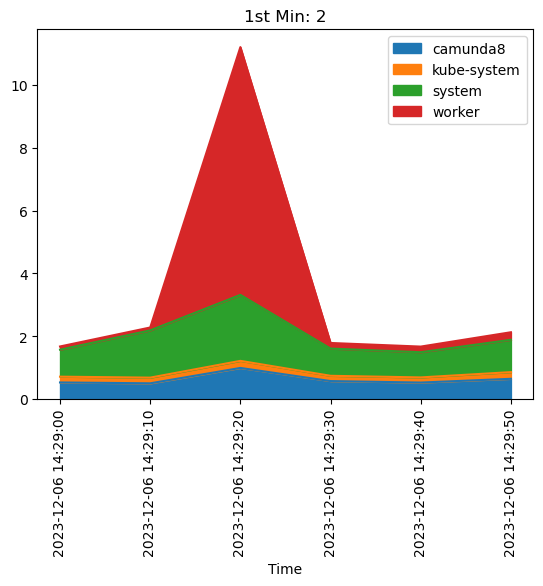

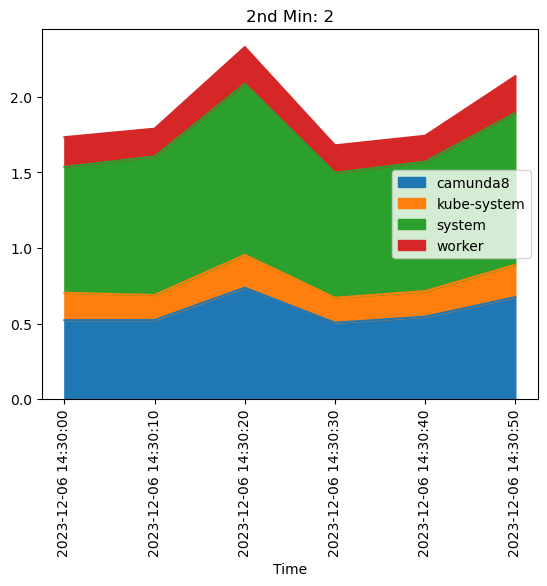

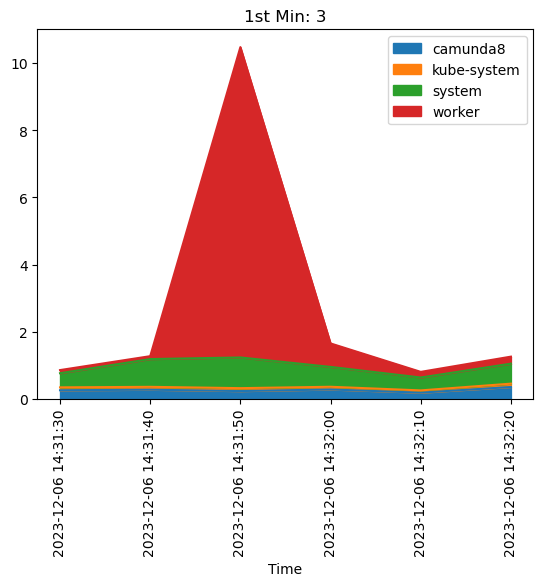

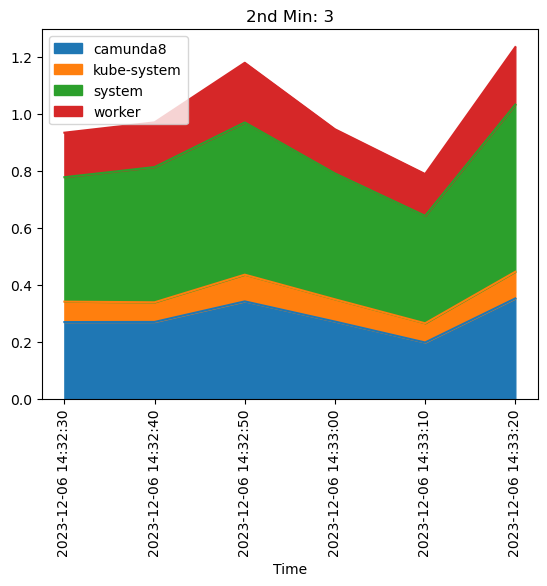

In [47]:
for i in range(0,3):
    first_min_multiple_by_namespaces_per_worker[i].plot(kind="area", title="1st Min: {}".format(i+1))
    plt.xticks(rotation="vertical")
    second_min_multiple_by_namespaces_per_worker[i].plot(kind="area", title="2nd Min: {}".format(i+1))
    plt.xticks(rotation="vertical")

In [ ]:
# create diff to idle
# create diff to single starts